# Summer Olympics Data Analysis

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("summer.csv")
df

,Year,City,Sport,Discipline,Athlete,Country,Gender,Event,Medal
0,1896,Athens,Aquatics,Swimming,"HAJOS, Alfred",HUN,Men,100M Freestyle,Gold
1,1896,Athens,Aquatics,Swimming,"HERSCHMANN, Otto",AUT,Men,100M Freestyle,Silver
2,1896,Athens,Aquatics,Swimming,"DRIVAS, Dimitrios",GRE,Men,100M Freestyle For Sailors,Bronze
3,1896,Athens,Aquatics,Swimming,"MALOKINIS, Ioannis",GRE,Men,100M Freestyle For Sailors,Gold
4,1896,Athens,Aquatics,Swimming,"CHASAPIS, Spiridon",GRE,Men,100M Freestyle For Sailors,Silver
...,...,...,...,...,...,...,...,...,...
31160,2012,London,Wrestling,Wrestling Freestyle,"JANIKOWSKI, Damian",POL,Men,Wg 84 KG,Bronze
31161,2012,London,Wrestling,Wrestling Freestyle,"REZAEI, Ghasem Gholamreza",IRI,Men,Wg 96 KG,Gold
31162,2012,London,Wrestling,Wrestling Freestyle,"TOTROV, Rustam",RUS,Men,Wg 96 KG,Silver
31163,2012,London,Wrestling,Wrestling Freestyle,"ALEKSANYAN, Artur",ARM,Men,Wg 96 KG,Bronze


## Data Visualization of the dataset given

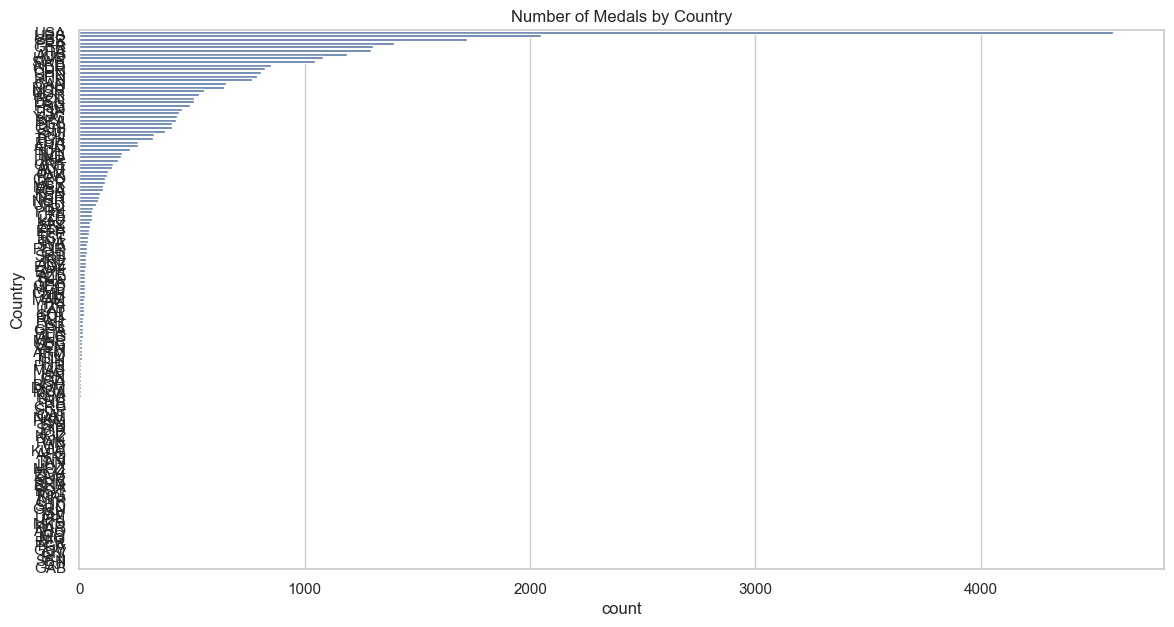

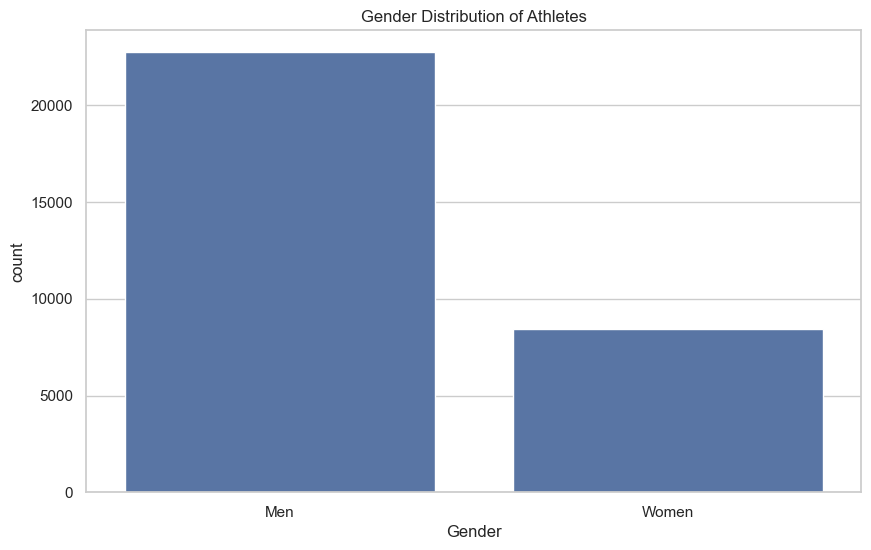

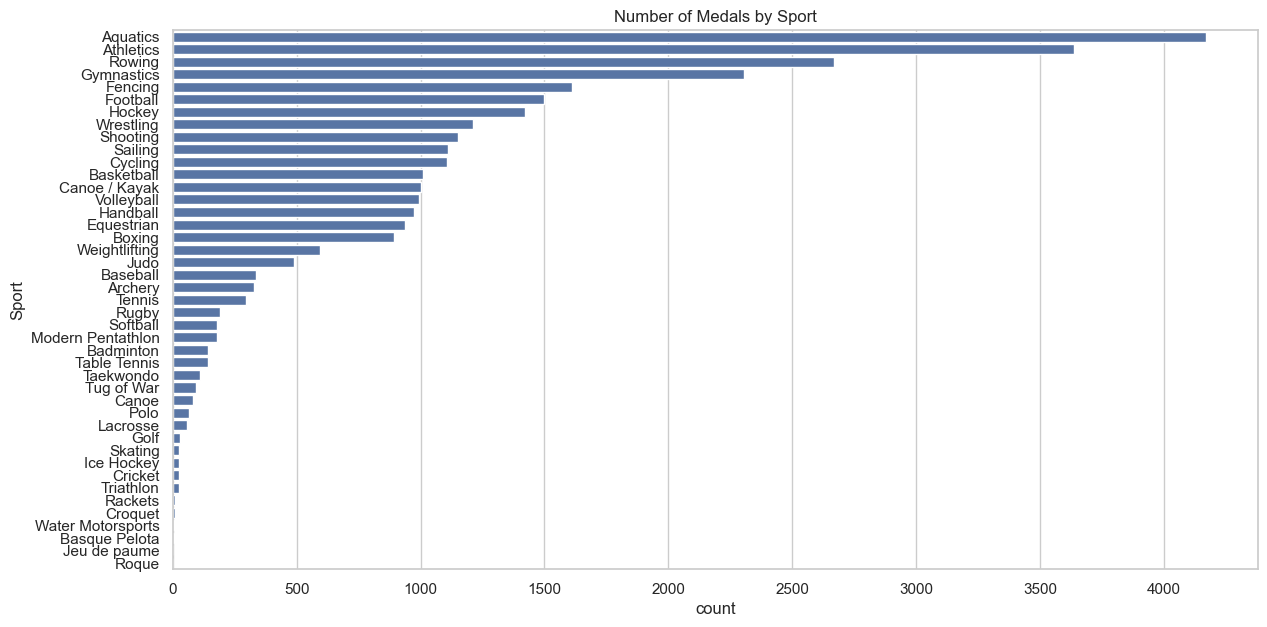

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the aesthetic style of the plots
sns.set_theme(style="whitegrid")

# Create a bar plot of the number of medals by country
plt.figure(figsize=(14, 7))
sns.countplot(y='Country', data=df, order=df['Country'].value_counts().index)
plt.title('Number of Medals by Country')
plt.show()

# Since there's no Age column, we will skip the distribution plot for Age

# Instead, let's create a count plot for the Gender distribution
plt.figure(figsize=(10, 6))
sns.countplot(x='Gender', data=df)
plt.title('Gender Distribution of Athletes')
plt.show()

# Create a count plot for the number of medals by sport
plt.figure(figsize=(14, 7))
sns.countplot(y='Sport', data=df, order=df['Sport'].value_counts().index)
plt.title('Number of Medals by Sport')
plt.show()

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31165 entries, 0 to 31164
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Year        31165 non-null  int64 
 1   City        31165 non-null  object
 2   Sport       31165 non-null  object
 3   Discipline  31165 non-null  object
 4   Athlete     31165 non-null  object
 5   Country     31161 non-null  object
 6   Gender      31165 non-null  object
 7   Event       31165 non-null  object
 8   Medal       31165 non-null  object
dtypes: int64(1), object(8)
memory usage: 2.1+ MB


In [6]:
df.describe()

,Year
count,31165.000000
mean,1970.482785
std,33.158416
min,1896.000000
25%,1948.000000
50%,1980.000000
75%,2000.000000
max,2012.000000


In [7]:
# Check for missing values
df.isnull().sum()

Year          0
City          0
Sport         0
Discipline    0
Athlete       0
Country       4
Gender        0
Event         0
Medal         0
dtype: int64

In [8]:
# Handle missing values (if any)
df = df.fillna(method='ffill')

C:\Users\shahk\AppData\Local\Temp\ipykernel_24732\2928564483.py:2: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df = df.fillna(method='ffill')


## 1. In how many cities Summer Olympics is held so far?

In [9]:
cities = df["City"].unique() #unique cities in an array
no_of_cities = len(cities)
print("In {} cities summmer olympics is held so far".format(no_of_cities))

In 22 cities summmer olympics is held so far


## 2. Which sport is having most number of Gold Medals so far? (Top 5)

The sport with highest number of gold medals
          Sport  No of Gold Medals
0     Aquatics               1421
1    Athletics               1215
17      Rowing                890
4   Gymnastics                820
3      Fencing                552


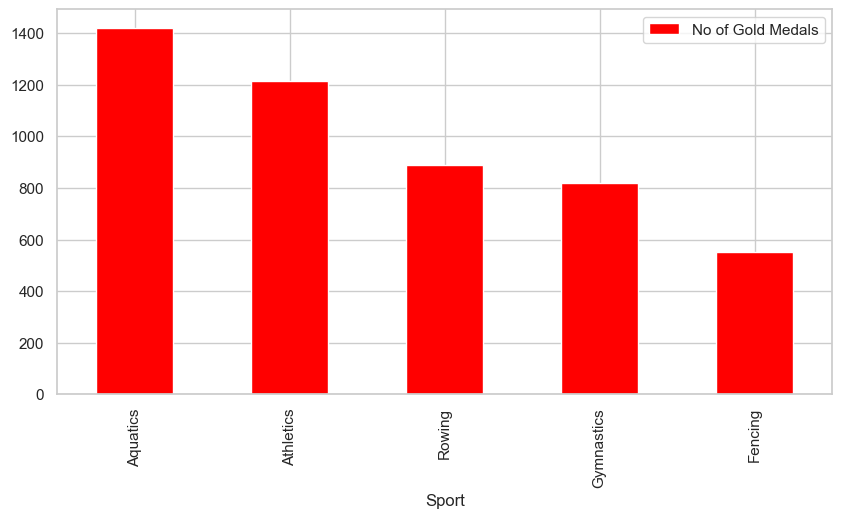

In [10]:
top5_sports_gold_medals = []

# Iterate through each unique sport to count the number of Gold medals
for sport in df["Sport"].unique() :
    df = df[df["Sport"] == sport]
    top5_sports_gold_medals.append([sport,len(df[df["Medal"] == "Gold"])]) 
    df = pd.read_csv("summer.csv")

# Create a DataFrame from the list
top5_sports_gold_medals = pd.DataFrame(top5_sports_gold_medals , columns = ["Sport" , "No of Gold Medals"])

# Sort the DataFrame to get the top 5 sports with the least Gold medals
top5_sports_gold_medals = top5_sports_gold_medals.sort_values(by = "No of Gold Medals",ascending = False).head()

print("The sport with highest number of gold medals\n", top5_sports_gold_medals)

top5_sports_gold_medals = top5_sports_gold_medals.plot(x = "Sport",y = "No of Gold Medals",
                                                        kind = "bar",figsize = (10,5),color = "red") 

## 3. Which sport is having least number of Bronze Medals so far?

In [11]:
sports_bronze_medals = []

for sport in df["Sport"].unique():
    sport_df = df[df["Sport"] == sport]
    bronze_count = len(sport_df[sport_df["Medal"] == "Bronze"])
    sports_bronze_medals.append([sport, bronze_count])

sports_bronze_medals_df = pd.DataFrame(sports_bronze_medals, columns=["Sport", "No of Bronze Medals"])

sports_bronze_medals_df = sports_bronze_medals_df.sort_values(by="No of Bronze Medals", 
                                                                            ascending=True).head(5)

print("Top Sport with Least Bronze Medals:\n", sports_bronze_medals_df)

Top Sport with Least Bronze Medals:
                 Sport  No of Bronze Medals
28  Water Motorsports                    0
22           Lacrosse                    0
10      Basque Pelota                    0
11            Cricket                    0
25       Jeu de paume                    1


## 4. Which sport is having highest number of medals so far? (Top 5)

The sport with highest number of medals
          Sport  No of Medals
0     Aquatics          4170
1    Athletics          3638
17      Rowing          2667
4   Gymnastics          2307
3      Fencing          1613


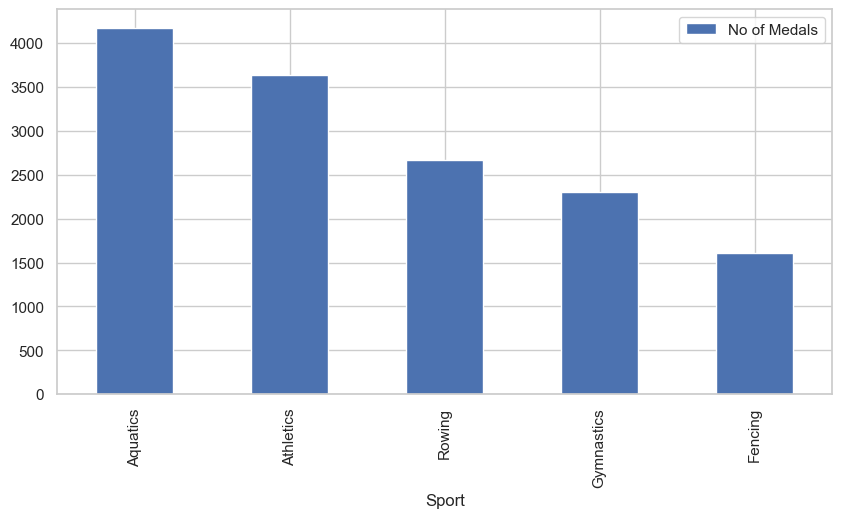

In [12]:
top5_sports_medal = []

for sport in df["Sport"].unique() :
    df = df[df["Sport"] == sport]
    top5_sports_medal.append([sport, len(df[df["Sport"] == sport])])
    df = pd.read_csv("summer.csv")
top5_sports_medal = pd.DataFrame(top5_sports_medal , columns = ["Sport" , "No of Medals"]) 
top5_sports_medal = top5_sports_medal.sort_values(by = "No of Medals",ascending = False).head()

print("The sport with highest number of medals\n", top5_sports_medal)

top5_sports_medal = top5_sports_medal.plot(x = "Sport",y = "No of Medals",kind = "bar",figsize = (10,5))

 ## 5. Which country has won the most medals in the Summer Olympics? (Top 5)

Top 5 Countries with Most Medals:
 Country
USA    4585
URS    2049
GBR    1720
FRA    1396
GER    1305
Name: count, dtype: int64


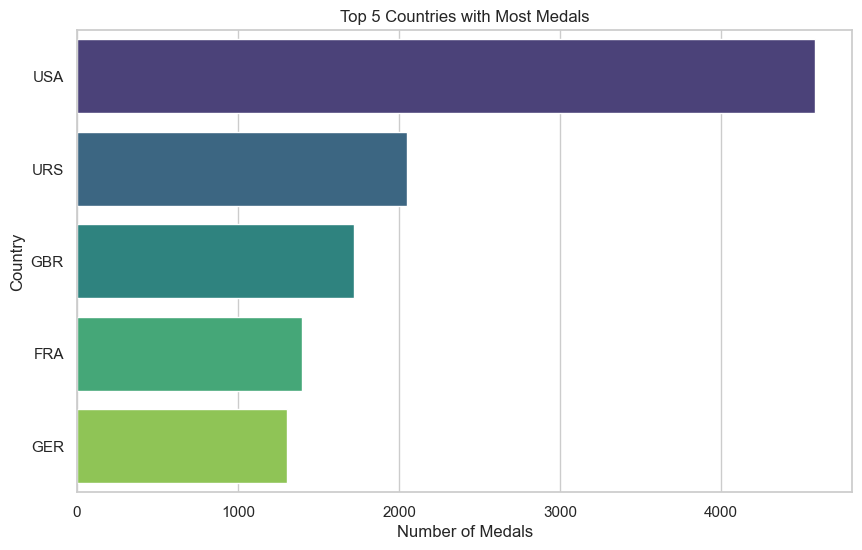

In [13]:
top5_countries_medals = df['Country'].value_counts().head(5)

print("Top 5 Countries with Most Medals:\n", top5_countries_medals)

# Plotting the data
plt.figure(figsize=(10, 6))
sns.barplot(x=top5_countries_medals.values, y=top5_countries_medals.index, hue=top5_countries_medals.index, palette='viridis', dodge=False, legend=False)
plt.title('Top 5 Countries with Most Medals')
plt.xlabel('Number of Medals')
plt.ylabel('Country')
plt.show()

## 6. Who are the top 5 athletes with the most medals in the Summer Olympics?

Top 5 Athletes with Most Medals:
 Athlete
PHELPS, Michael         22
LATYNINA, Larisa        18
ANDRIANOV, Nikolay      15
ONO, Takashi            13
MANGIAROTTI, Edoardo    13
Name: count, dtype: int64


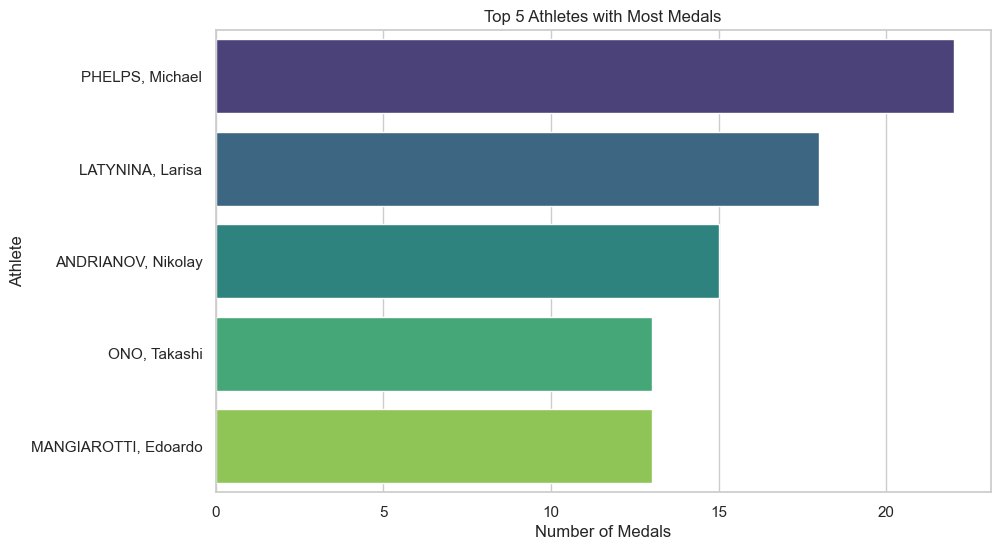

In [14]:
top5_athletes_medals = df['Athlete'].value_counts().head(5)

print("Top 5 Athletes with Most Medals:\n", top5_athletes_medals)

# Plotting the data
plt.figure(figsize=(10, 6))
sns.barplot(x=top5_athletes_medals.values, y=top5_athletes_medals.index, hue=top5_athletes_medals.index, palette='viridis', dodge=False, legend=False)
plt.title('Top 5 Athletes with Most Medals')
plt.xlabel('Number of Medals')
plt.ylabel('Athlete')
plt.show()

## 7: Which athlete has won the most Silver Medals in the Summer Olympics? (Top 5)

Top 5 Athletes with Most Silver Medals:
                          Athlete  No of Silver Medals
9513   BABASHOFF, Shirley Farber                    6
10801        DITYATIN, Aleksandr                    6
9216            VORONIN, Mikhail                    6
14681           POPOV, Alexander                    5
17788            KOVACS, Katalin                    5


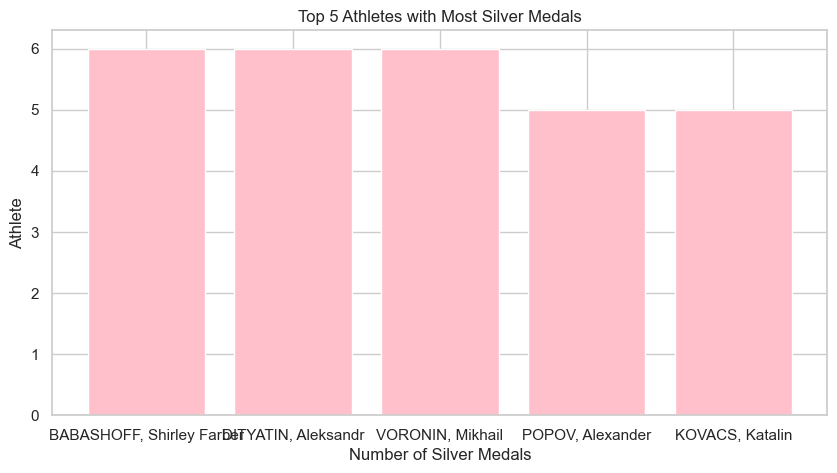

In [15]:
top5_athletes_silver_medals = []

for athlete in df["Athlete"].unique():
    athlete_df = df[df["Athlete"] == athlete]
    silver_count = len(athlete_df[athlete_df["Medal"] == "Silver"])
    top5_athletes_silver_medals.append([athlete, silver_count])

top5_athletes_silver_medals_df = pd.DataFrame(top5_athletes_silver_medals, columns=["Athlete", "No of Silver Medals"])

top5_athletes_silver_medals_df = top5_athletes_silver_medals_df.sort_values(by="No of Silver Medals", ascending=False).head(5)

print("Top 5 Athletes with Most Silver Medals:\n", top5_athletes_silver_medals_df)

plt.figure(figsize=(10, 5))
plt.bar(top5_athletes_silver_medals_df['Athlete'], top5_athletes_silver_medals_df['No of Silver Medals'], 
            color='pink')
plt.title('Top 5 Athletes with Most Silver Medals')
plt.xlabel('Number of Silver Medals')
plt.ylabel('Athlete')
plt.show()

## 8. Which event is most popular in terms on number of players? (Top 5)

Top 5 Most Popular Events in Terms of Number of Players:
                 Event  No of Players
80           Football           1497
176            Hockey           1422
138  Team Competition           1147
327        Basketball           1012
337          Handball            973


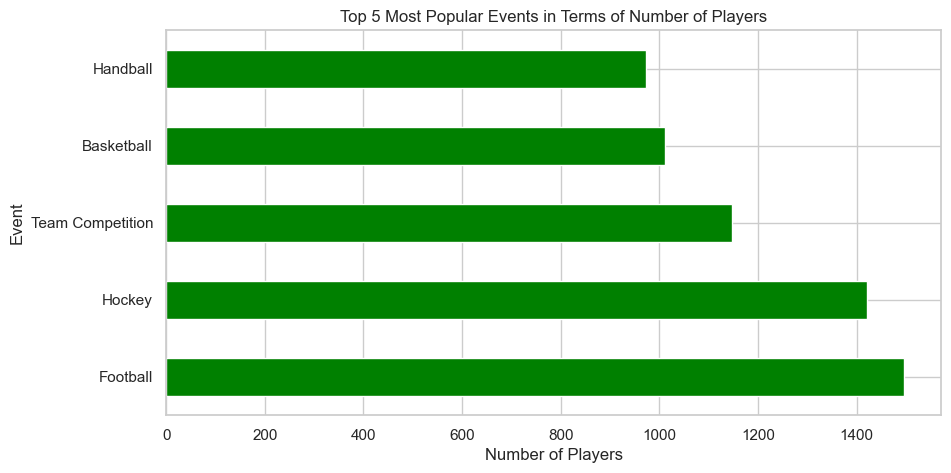

In [18]:
top5_events = []
for event in df["Event"].unique() :
    top5_events.append([event , len(df[df["Event"] == event])])
top5_events = pd.DataFrame(top5_events , columns = ["Event" , "No of Players"]).sort_values(by = "No of Players" , ascending = False).head()
print("Top 5 Most Popular Events in Terms of Number of Players:\n", top5_events)

top5_events.plot(x="Event", y="No of Players", color="green", kind="barh", figsize=(10, 5), legend=False)
plt.title('Top 5 Most Popular Events in Terms of Number of Players')
plt.xlabel('Number of Players')
plt.ylabel('Event')
plt.show()

## 9. In which year India won first Gold Medal in Summer Olympics?

In [19]:
india_gold_medals = df[(df['Country'] == 'India') & (df['Medal'] == 'Gold')]

first_gold_year = india_gold_medals['Year'].min()

print("India won its first Gold Medal in the Summer Olympics in the year:", first_gold_year)

India won its first Gold Medal in the Summer Olympics in the year: nan


## 10. Which sport is having most female Gold Medalists? Also give the count of that gold medals

In [20]:
data = []

for sport in df["Sport"].unique() :
    player_df = df[df["Sport"] == sport]
    female_df = player_df[player_df["Gender"] == "Women"]
    gold_medal_df = female_df[female_df["Medal"] == "Gold"]

print("The sport which is having most female Gold Medals is:", sport)
print("The", sport, "has total female Gold Medals equal to:", len(gold_medal_df))

The sport which is having most female Gold Medals is: Canoe
The Canoe has total female Gold Medals equal to: 9


## 11. Show distribution of Gold Medals

Medal      Bronze    Gold  Silver
Sport                            
Aquatics   1365.0  1421.0  1384.0
Archery      90.0   126.0   113.0
Athletics  1199.0  1215.0  1224.0
Badminton    52.0    46.0    46.0
Baseball    112.0   111.0   112.0


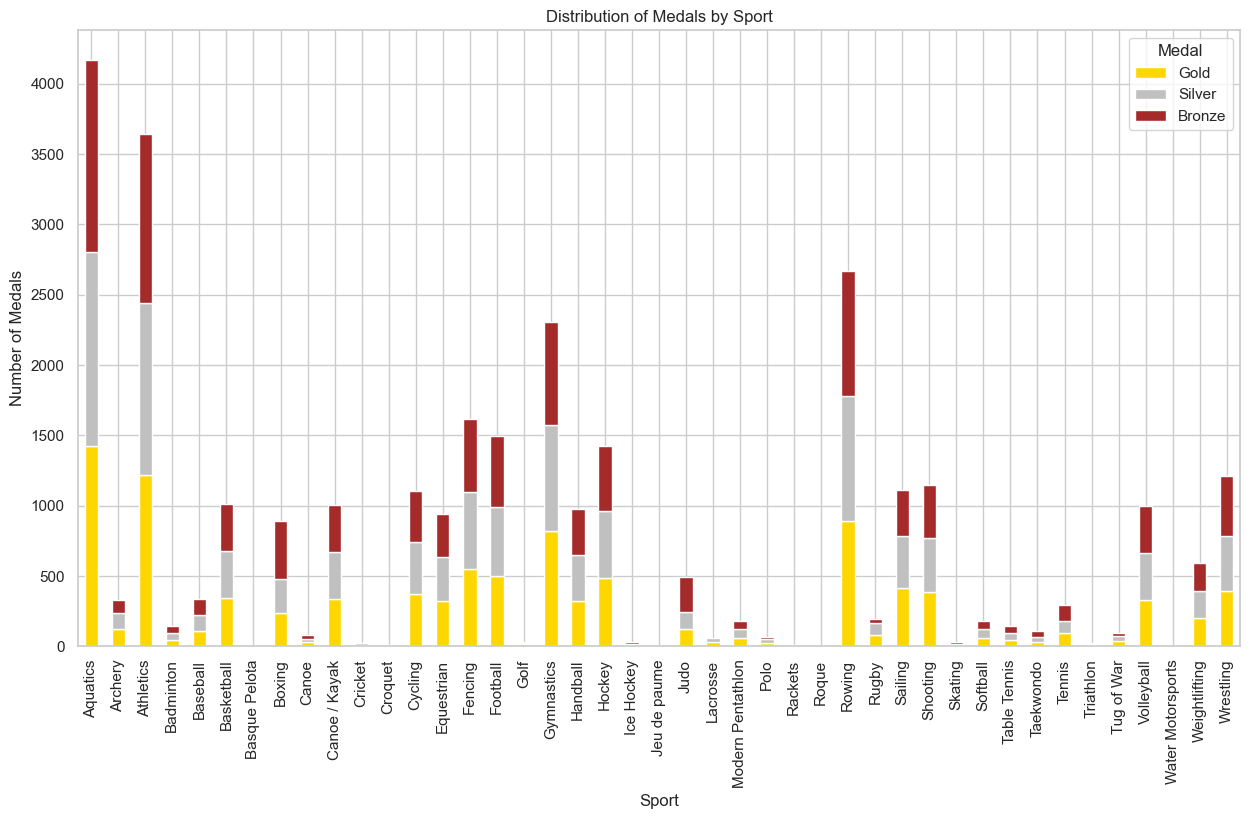

In [21]:
medal_counts = df.groupby(['Sport', 'Medal']).size().reset_index(name='Count')

view_medal_dist = medal_counts.pivot(index='Sport', columns='Medal', values='Count').fillna(0)

print(view_medal_dist.head())

columns_to_plot = ['Gold', 'Silver', 'Bronze']
missing_columns = [col for col in columns_to_plot if col not in view_medal_dist.columns]
if missing_columns:
    print(f"Missing columns in the DataFrame: {missing_columns}")
else:
    # Plotting the stacked bar chart
    view_medal_dist[columns_to_plot].plot(kind='bar', stacked=True, figsize=(15, 8), 
                                                color=['gold', 'silver', 'brown'])
    plt.title('Distribution of Medals by Sport')
    plt.xlabel('Sport')
    plt.ylabel('Number of Medals')
    plt.legend(title='Medal')
    plt.show()

## 12. Number of Medals over the years

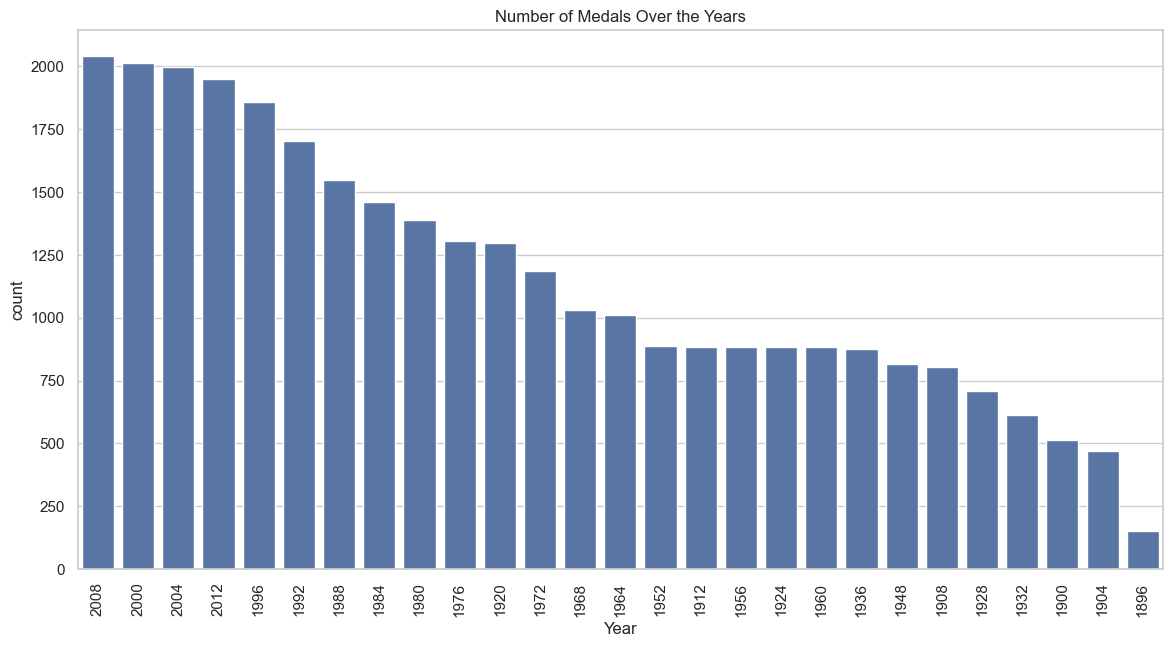

In [16]:
# Create a count plot for the number of medals over the years
plt.figure(figsize=(14, 7))
sns.countplot(x='Year', data=df, order=df['Year'].value_counts().index)
plt.title('Number of Medals Over the Years')
plt.xticks(rotation=90)
plt.show()

## 13. Percentage Distribution of medals in the Dataset


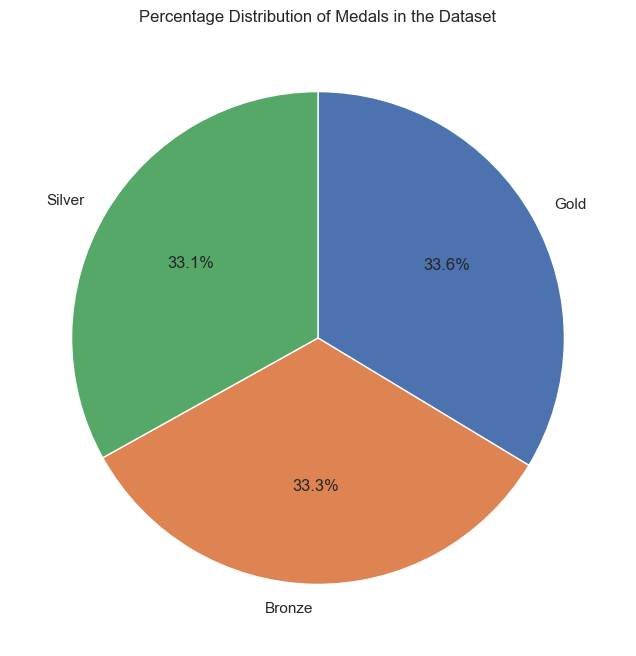

In [22]:
medal_distribution = df['Medal'].value_counts()

# Create a pie chart to show the percentage of medals distributed
plt.figure(figsize=(8, 8))
plt.pie(medal_distribution, labels=medal_distribution.index, autopct='%1.1f%%', startangle=90, counterclock=False)
plt.title('Percentage Distribution of Medals in the Dataset')
plt.show()

## Compare medal types across all sports

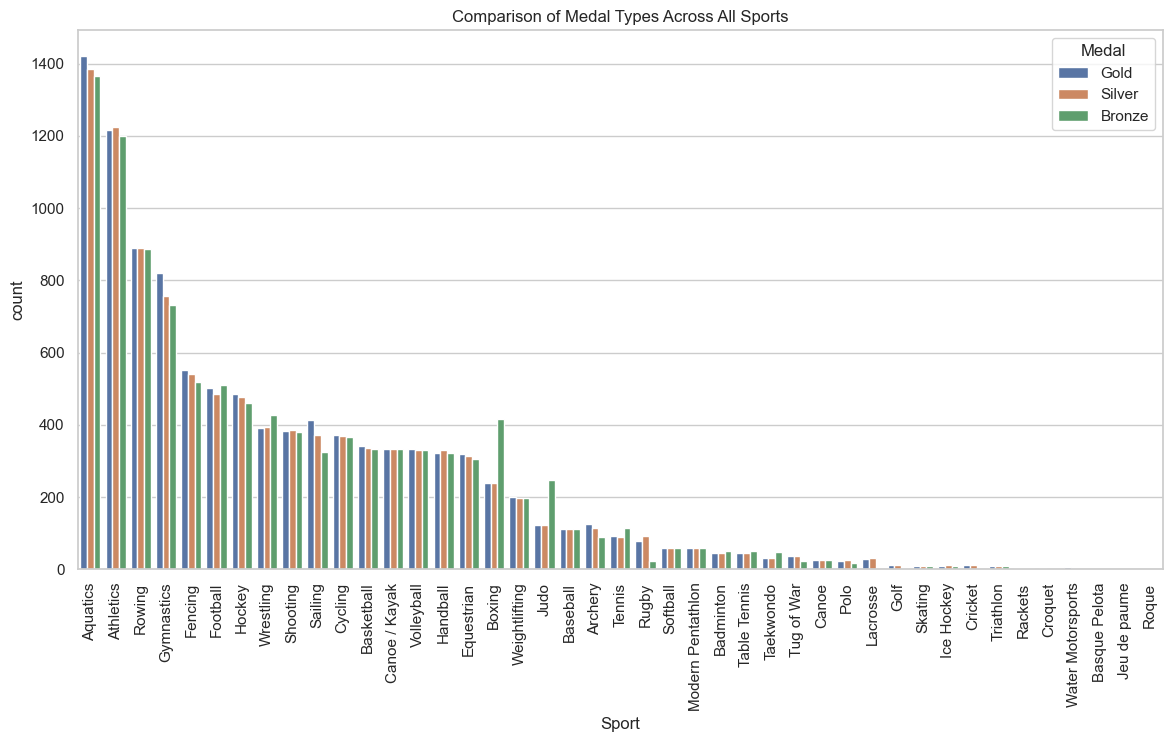

In [23]:
# Create a count plot to compare medal types across all sports
plt.figure(figsize=(14, 7))
sns.countplot(x='Sport', hue='Medal', data=df, order=df['Sport'].value_counts().index)
plt.title('Comparison of Medal Types Across All Sports')
plt.xticks(rotation=90)
plt.show()

## Medal distribution for team vs. individual sports

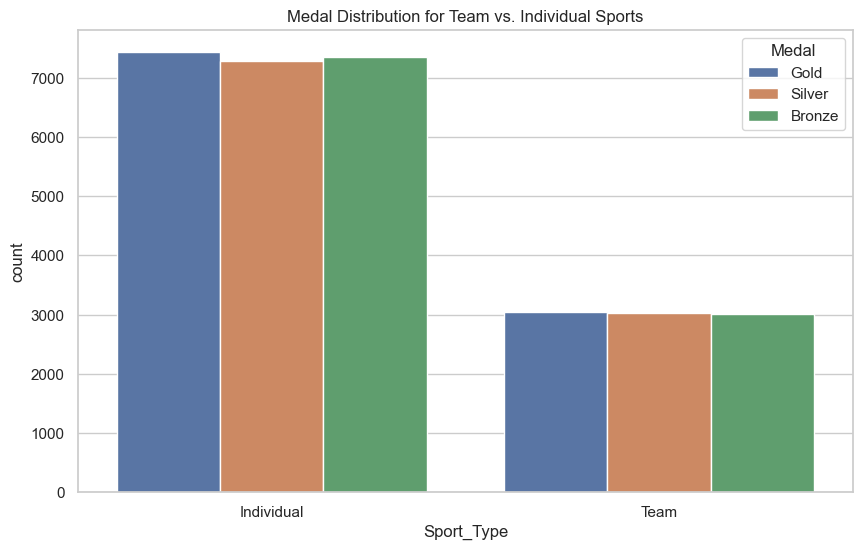

In [24]:
# Classify sports into 'team' or 'individual' --> this is a simplified classification; you can refine this list based on specific Olympic criteria
team_sports = ['Basketball', 'Football', 'Hockey', 'Volleyball', 'Handball', 'Water Polo', 'Rowing', 'Softball', 'Baseball']
df['Sport_Type'] = df['Sport'].apply(lambda x: 'Team' if x in team_sports else 'Individual')

plt.figure(figsize=(10, 6))
sns.countplot(x='Sport_Type', hue='Medal', data=df)
plt.title('Medal Distribution for Team vs. Individual Sports')
plt.show()


## Interactive Dashboard using PyGWalker module

In [17]:
import pandas as pd
import pygwalker as pyg
# Create an interactive visualization using PyGWalker
pyg.walk(df)

Box(children=(HTML(value='\n<div id="ifr-pyg-00062244cc13c72dNOTxupVlyLQYAw9Z" style="height: auto">\n    <hea…

## Generate Interactive Report using Sweetviz Module

In [25]:
df = pd.read_csv('summer.csv')

import sweetviz as sv

# Generate a Sweetviz report
report = sv.analyze(df)
report.show_html('Summer_Olympics_Report.html') 

# After running this code, you will be redirected to a report.html file

                                             |          | [  0%]   00:00 -> (? left)

Report Summer_Olympics_Report.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.
